<a href="https://colab.research.google.com/github/DNageshNaik/Carona_data_vizualization/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Links
https://www.kaggle.com/fedi1996/covid-19-analysis-visualization-and-comparaisons/notebook

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

#1.Dataset Information



##1.Reading the csv file



In [ ]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
covid_data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515
...,...,...,...,...,...,...,...,...
271,NaN,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.5800
272,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100
273,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000
274,NaN,Republic of the Congo,2020-03-17T21:33:03,0,0,0,-1.4400,15.5560


Here's what we can tell by looking at the data frame:

The file provides four countrywise counts for Covid-19 in the world
The metrics reported are Province/State, Country/Region, Last Update, Confirmed,
       Deaths, Recovered, Latitude, Longitude
Data is provided for 276 countries
Keep in mind that these are officially reported numbers, and the actual number of cases & deaths may be higher, as not all cases are diagnosed.

In [ ]:
#.info method is used to view some basic information
print("\nDataset information:")
print(covid_data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  126 non-null    object 
 1   Country/Region  276 non-null    object 
 2   Last Update     276 non-null    object 
 3   Confirmed       276 non-null    int64  
 4   Deaths          276 non-null    int64  
 5   Recovered       276 non-null    int64  
 6   Latitude        276 non-null    float64
 7   Longitude       276 non-null    float64
dtypes: float64(2), int64(3), object(3)
memory usage: 17.4+ KB
None


It appears that each column contains values of a specific data type. For the numeric columns, you can view the some statistical information like mean, standard deviation, minimum/maximum values and number of non-empty values using the .describe method.

In [ ]:
covid_data.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,276.000000,276.000000,276.000000,276.000000,276.000000
mean,714.376812,28.641304,292.898551,26.761055,4.273018
std,4710.730292,248.763367,3391.772577,22.879848,80.561775
min,0.000000,0.000000,0.000000,-41.454500,-157.498300
25%,7.000000,0.000000,0.000000,13.444300,-71.548225
50%,37.000000,0.000000,0.000000,33.476500,9.777700
75%,161.250000,1.000000,4.250000,42.530375,65.169900
max,67799.000000,3111.000000,56003.000000,71.706900,174.886000


The columns property contains the list of columns within the data frame.

In [ ]:
covid_data.columns

Index(['Province/State', 'Country/Region', 'Last Update', 'Confirmed',
       'Deaths', 'Recovered', 'Latitude', 'Longitude'],
      dtype='object')

You can also retrieve the number of rows and columns in the data frame using the .shape method

In [ ]:
covid_data.shape

(276, 8)

###Retrieving data from a dataframe

The first thing you might want to do is to retrieve data from this data frame e.g. the counts of a specific day or the list of values in a specific column. To do this, it might help to understand the internal representation of data in a data frame. Conceptually, you can think of a dataframe as a dictionary of lists: the keys are column names, and the values are lists/arrays containing data for the respective columns.

Representing data in the above format has a few benefits:

All values in a column typically have the same type of value, so it's more efficient to store them in a single array.
Retrieving the values for a particular row simply requires extracting the elements at a given index from each of the column arrays.
The representation is more compact (column names are recorded only once) compared to other formats where you might use a dictionary for each row of data (example shown below).

With the dictionary of lists analogy in mind, we can now guess how we might be able to retrieve data from a data frame. for example, we can get a list of values from a specific column using the [] indexing notation.

In [ ]:
covid_data['Confirmed']

0      67799
1      31506
2      16169
3      11748
4       9257
       ...  
271        0
272        0
273        0
274        0
275        0
Name: Confirmed, Length: 276, dtype: int64

Each column is represented using a data structure called Series, which is essentially a numpy array with some extra methods and properties.

In [ ]:
type(covid_data['Confirmed'])

pandas.core.series.Series

Just like arrays, you can retrieve a specific value with a series using the indexing notation []

In [ ]:
covid_data['Confirmed'][246]

1

Pandas also provides the .at method to directly retrieve at a specific row & column.

In [ ]:
covid_data.at[246, 'Confirmed']

1

Instead of using the indexing notation [], Pandas also allows accessing columns as properties of the data frame using the . notation. However, this method only works for columns whose names do not contain spaces or special chracters.

###Missing values

In [ ]:
covid_data['Province/State'].first_valid_index()

0

In [ ]:
print("\nMissing data information:")
print(covid_data.isna().sum())


Missing data information:
Province/State    150
Country/Region      0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Latitude            0
Longitude           0
dtype: int64


####Analyzing Data from data frames

# 1.Corona virus in the world

In [ ]:
data = covid_data.copy()
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515


Replacing "Mainland China" with "China"

In [ ]:
data['Country/Region'] = data['Country/Region'].replace('Mainland China', 'China')

Creating new feature "Active_case"    Active_case = Confirmed - Deaths - Recovered

In [ ]:
data['Active_case'] = data['Confirmed'] - data['Deaths'] - data['Recovered']
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active_case
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166


In [ ]:
#data[["Confirmed","Deaths","Recovered"]] =data[["Confirmed","Deaths","Recovered"]].astype(int)

creating new column observation date for the date and it was extracted from Last update

In [ ]:
data['ObservationDate'] = data["Last Update"].str.split("T", n = 1, expand = True)[0] 
data.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active_case,ObservationDate
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685,2020-03-17
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062,2020-03-17
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792,2020-03-17
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187,2020-03-17
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166,2020-03-17


In [ ]:
#gives the latest date
max(data['ObservationDate'])

'2020-03-17'

In [ ]:
#rows which are on the latest date
data[data['ObservationDate'] == max(data['ObservationDate'])]

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active_case,ObservationDate
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685,2020-03-17
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062,2020-03-17
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792,2020-03-17
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187,2020-03-17
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166,2020-03-17
...,...,...,...,...,...,...,...,...,...,...
268,West Virginia,US,2020-03-17T23:33:02,1,0,0,38.4912,-80.9545,1,2020-03-17
271,NaN,Guernsey,2020-03-17T18:33:03,0,0,0,49.4500,-2.5800,0,2020-03-17
272,NaN,Jersey,2020-03-17T18:33:03,0,0,0,49.1900,-2.1100,0,2020-03-17
273,NaN,Puerto Rico,2020-03-17T16:13:14,0,0,0,18.2000,-66.5000,0,2020-03-17


In [ ]:
#adding an index column
Data = data[data['ObservationDate'] == max(data['ObservationDate'])].reset_index()

In [ ]:
Data.head()

,index,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active_case,ObservationDate
0,0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685,2020-03-17
1,1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062,2020-03-17
2,2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792,2020-03-17
3,3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187,2020-03-17
4,4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166,2020-03-17


In [ ]:
#unique tells us the no of elements a column
Data.ObservationDate.unique()

array(['2020-03-17'], dtype=object)

In [ ]:
Data_world = Data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index()

In [ ]:
Data_world

,ObservationDate,Confirmed,Active_case,Recovered,Deaths
0,2020-03-17,188215,106931,73463,7821


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
pd.set_option('display.max_rows', None)
from plotly.subplots import make_subplots
import seaborn as sns
import datetime

In [ ]:
labels = ["Last Update","Confirmed","Active cases","Recovered","Deaths"]
fig = go.Figure(data=[go.Table(header=dict(values=labels),
                 cells=dict(values=Data_world.loc[0,["ObservationDate","Confirmed","Active_case","Recovered","Deaths"]]))
                     ])
fig.update_layout(
    title='Coronavirus in the word : ',
)
fig.show()

In [ ]:
labels = ["Active cases","Recovered","Deaths"]
values = Data_world.loc[0, ["Active_case","Recovered","Deaths"]]
fig = px.pie(Data_world, values=values, names=labels,color_discrete_sequence=['rgb(77,146,33)','rgb(69,144,185)','rgb(77,77,77)'],hole=0.7)
fig.update_layout(
    title='Total cases : '+str(Data_world["Confirmed"][0]),
)
fig.show()

# 2.Latest number of confirmed cases of Coronavirus (COVID-19) Country wise.

In [ ]:
import pandas as pd
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
result = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
print(result) 

                     Country/Region  Confirmed  Deaths  Recovered  Active
0                       Afghanistan         22       0          1      21
1                           Albania         55       1          0      54
2                           Algeria         60       4         12      44
3                           Andorra         39       0          1      38
4               Antigua and Barbuda          1       0          0       1
..                              ...        ...     ...        ...     ...
154                         Uruguay         29       0          0      29
155                      Uzbekistan         10       0          0      10
156                       Venezuela         33       0          0      33
157                         Vietnam         66       0         16      50
158  occupied Palestinian territory          0       0          0       0

[159 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##3.latest number of confirmed deaths and recovered people of Novel Coronavirus (COVID-19) cases Country/Region - Province/State wise


In [ ]:
import pandas as pd
data = covid_data.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].max()
pd.set_option('display.max_rows', None)
#print(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


##4.to get the Chinese province wise cases of confirmed, deaths and recovered cases of Novel Coronavirus (COVID-19)

In [ ]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
c_data = covid_data[covid_data['Country/Region']=='China']
c_data = c_data[['Province/State', 'Confirmed', 'Deaths', 'Recovered']]
result = c_data.sort_values(by='Confirmed', ascending=False)
result = result.reset_index(drop=True)
#print(result)

##5.to get the latest country wise deaths cases of Novel Coronavirus (COVID-19)

In [ ]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Deaths']>0][['Country/Region', 'Deaths']]
#print(result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##6.to list countries with no cases of Novel Coronavirus (COVID-19) recovered.

In [ ]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Recovered']==0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
#print(result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##7.to list countries with all cases of Novel Coronavirus (COVID-19) died

In [ ]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Confirmed']==data['Deaths']]
result = result[['Country/Region', 'Confirmed', 'Deaths']]
result = result.sort_values('Confirmed', ascending=False)
result = result[result['Confirmed']>0]
result = result.reset_index(drop=True)
#print(result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##8.to list countries with all cases of Novel Coronavirus (COVID-19) recovered

In [ ]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Confirmed']==data['Recovered']]
result = result[['Country/Region', 'Confirmed', 'Recovered']]
result = result.sort_values('Confirmed', ascending=False)
result = result[result['Confirmed']>0]
result = result.reset_index(drop=True)
#print(result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


##9.to get the top 10 countries data (Last Update, Country/Region, Confirmed, Deaths, Recovered) of Novel Coronavirus (COVID-19)

In [ ]:
import pandas as pd
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-18-2020.csv', usecols = ['Last Update', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])
result = covid_data.groupby('Country/Region').max().sort_values(by='Confirmed', ascending=False)[:10]
pd.set_option('display.max_column', None)
#print(result)

##10.to create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


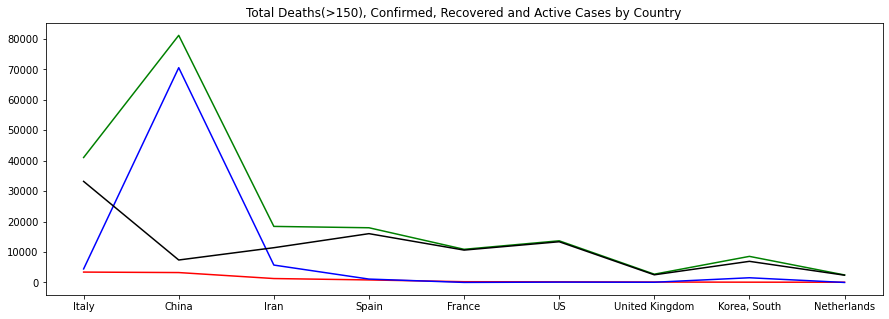

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv', usecols = ['Last Update', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered'])
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
 
r_data = covid_data.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
r_data = r_data.sort_values(by='Deaths', ascending=False)
r_data = r_data[r_data['Deaths']>50]
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country/Region'], r_data['Deaths'],color='red')
plt.plot(r_data['Country/Region'], r_data['Confirmed'],color='green')
plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue')
plt.plot(r_data['Country/Region'], r_data['Active'], color='black')
 
plt.title('Total Deaths(>150), Confirmed, Recovered and Active Cases by Country')
plt.show()

##11.to visualize the state/province wise death cases of Novel Coronavirus (COVID-19) in USA.

In [ ]:
import pandas as pd
import plotly.express as px
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-17-2020.csv')
us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
us_data = us_data.groupby(['Province/State'])['Deaths'].sum().reset_index()
us_data_death = us_data[us_data['Deaths'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19 in USA', text='Deaths')
state_fig.show()

##12.to visualize the state/province wise Active cases of Novel Coronavirus (COVID-19) in USA.

In [ ]:
import pandas as pd
import plotly.express as px
 
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-18-2020.csv')
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
us_data = us_data[us_data.sum(axis = 1) > 0]
 
us_data = us_data.groupby(['Province/State'])['Active'].sum().reset_index()
us_data_death = us_data[us_data['Active'] > 0]
state_fig = px.bar(us_data_death, x='Province/State', y='Active', title='State wise recovery cases of COVID-19 in USA', text='Active')
state_fig.show()

##13.to visualize the state/province wise combine number of confirmed, deaths, recovered, active Novel Coronavirus (COVID-19) cases in USA

In [ ]:
import pandas as pd
import plotly.express as px
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv')
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
combine_us_data = covid_data[covid_data['Country/Region']=='US'].drop(['Country/Region','Latitude', 'Longitude'], axis=1)
combine_us_data = combine_us_data[combine_us_data.sum(axis = 1) > 0]
combine_us_data = combine_us_data.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
combine_us_data = pd.melt(combine_us_data, id_vars='Province/State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig = px.bar(combine_us_data, x='Province/State', y='Count', text='Count', barmode='group', color='Case', title='USA State wise combine number of confirmed, deaths, recovered, active COVID-19 cases')
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



##15.to visualize Worldwide Confirmed Novel Coronavirus (COVID-19) cases over time

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
 
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-19-2020.csv')
grouped = covid_data.groupby('Last Update')['Last Update', 'Confirmed', 'Deaths'].sum().reset_index()
fig = px.line(grouped, x="Last Update", y="Confirmed",
             title="Worldwide Confirmed Novel Coronavirus(COVID-19) Cases Over Time")
fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



#2.Evaluation of confirmed cases over time in the world

In [ ]:
data_over_time= data.groupby(["ObservationDate"])[["Confirmed","Active_case","Recovered","Deaths"]].sum().reset_index().sort_values("ObservationDate",ascending=True).reset_index(drop=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Confirmed'],
                    mode='lines',
                    name='Confirmed cases'))


fig.update_layout(
    title='Evolution of Confirmed cases over time in the word',
        template='plotly_white',
      yaxis_title="Confirmed cases",
    xaxis_title="Days",

)

fig.show()

In [ ]:
fig = go.Figure()


fig.add_trace(go.Scatter(x=data_over_time.index, y=data_over_time['Active_case'],
                    mode='lines',marker_color='yellow',
                    name='Active cases',line=dict( dash='dot')))

fig.update_layout(
    title='Evolution of Active cases over time in the world',
        template='plotly_dark',
      yaxis_title="Active cases",
    xaxis_title="Days",

)

fig.show()

# Corona in India

In [ ]:
Data_tunisia = data [(data['Country/Region'] == 'Tunisia') ].reset_index(drop=True)
Data_tunisia.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active_case,ObservationDate
0,NaN,Tunisia,2020-03-17T11:53:10,24,0,0,33.8869,9.5375,24,2020-03-17
